<a href="https://colab.research.google.com/github/KeshekaE/ColabUTD/blob/main/Eigen_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import pandas as pd

In [ ]:
lfw_ppl = fetch_lfw_people(min_faces_per_person=100,resize=0.5)
print(lfw_ppl)

{'data': array([[ 82.666664,  87.666664,  65.333336, ..., 106.      , 140.      ,
        199.33333 ],
       [ 52.333332,  49.333332,  69.333336, ..., 235.66667 , 228.66667 ,
        222.      ],
       [ 37.333332,  39.      ,  41.666668, ...,  97.      ,  71.666664,
         59.333332],
       ...,
       [228.33333 , 224.33333 , 216.      , ..., 149.66667 , 145.66667 ,
        164.66667 ],
       [ 97.666664, 118.333336, 133.33333 , ..., 219.      , 210.      ,
        142.      ],
       [ 39.333332,  79.333336, 109.333336, ...,  24.333334,  34.333332,
         24.      ]], dtype=float32), 'images': array([[[ 82.666664,  87.666664,  65.333336, ..., 105.666664,
         100.      ,  90.333336],
        [ 89.666664,  94.666664,  53.333332, ..., 107.      ,
         102.333336,  94.666664],
        [ 94.333336,  87.333336,  60.      , ...,  85.666664,
          98.      ,  94.333336],
        ...,
        [ 22.666666,  26.      ,  32.666668, ..., 102.      ,
          99.      , 109.

In [ ]:
n_samples,h,w= lfw_ppl.images.shape
X = lfw_ppl.data
n_features = X.shape[1]
y = lfw_ppl.target
target_names = lfw_ppl.target_names
n_classes = target_names.shape[0]  #No of categories/class labels

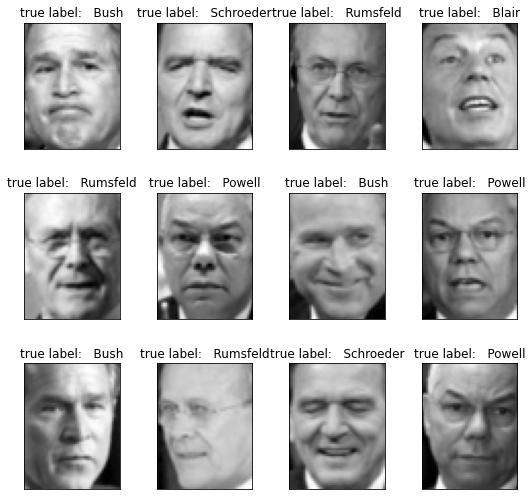

In [ ]:
# Function to plot images in 3 * 4 
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
 
# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)
 
true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [ ]:
X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size = 0.20, random_state= 10 )

print(X_tr.shape, X_tst.shape)

(912, 2914) (228, 2914)


In [ ]:
n_components = 100

pca = PCA(n_components = n_components).fit(X_tr)

eigenFaces = pca.components_.reshape((n_components, h, w))

X_tr_red = pca.transform(X_tr)
X_tst_red = pca.transform(X_tst)

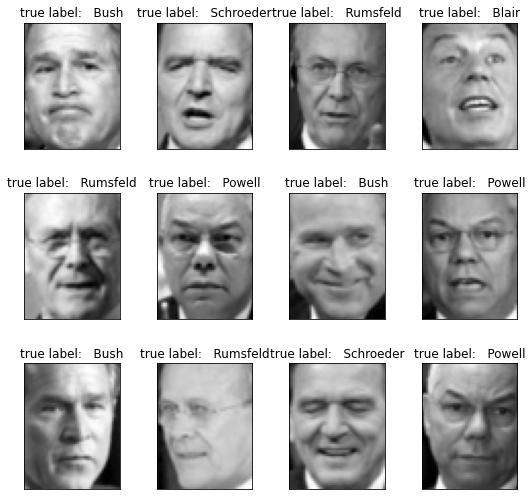

In [ ]:
plot_gallery(X, true_titles, h, w)

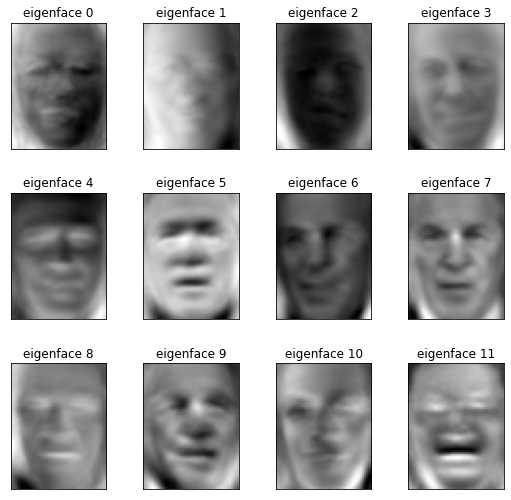

In [ ]:
eigenface_titles = ['eigenface %d' %i for i in range(eigenFaces.shape[0])]
plot_gallery(eigenFaces, eigenface_titles, h, w)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = X_tr
y = y_tr
#---perform a split---
random_state = 10
X_train, X_test, y_train, y_test = \
train_test_split(X, y,test_size = 0.8,shuffle = True,random_state=random_state)
#---train the model using Logistic Regression---
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_tr, y_tr)
#---evaluate the model---
log_reg.score(X_tst,y_tst)


0.8464912280701754